In [38]:
import pandas as pd

# Load the dataset and show the first 5 rows
df = pd.read_csv("Mall_Customers.csv")
df.head()# showing few coloums data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,15,81
2,3,Male,20,16,6
3,4,Female,23,16,77
4,5,Male,31,17,40


In [39]:
#showing information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
# some detailed info of numeric columns
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,28.800000,17.000000,49.400000
std,57.879185,12.805464,1.417762,33.376789
min,1.000000,19.000000,15.000000,3.000000
25%,50.750000,21.000000,16.000000,6.000000
50%,100.500000,23.000000,17.000000,56.000000
75%,150.250000,31.000000,18.000000,77.000000
max,200.000000,64.000000,19.000000,94.000000


In [41]:
# Checking  missing values from dataset
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [42]:
#data preprocessing
# droping the customerID column as it is not useful for clustering
df = df.drop("CustomerID", axis=1) #customer id is a identification of customer


In [43]:
# Converting the Gender column categorical data to numerical value
#clustring algo works with numerical value
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [44]:
from sklearn.preprocessing import StandardScaler # it standardize the features its remove the mean

# Initialize the scaler and scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


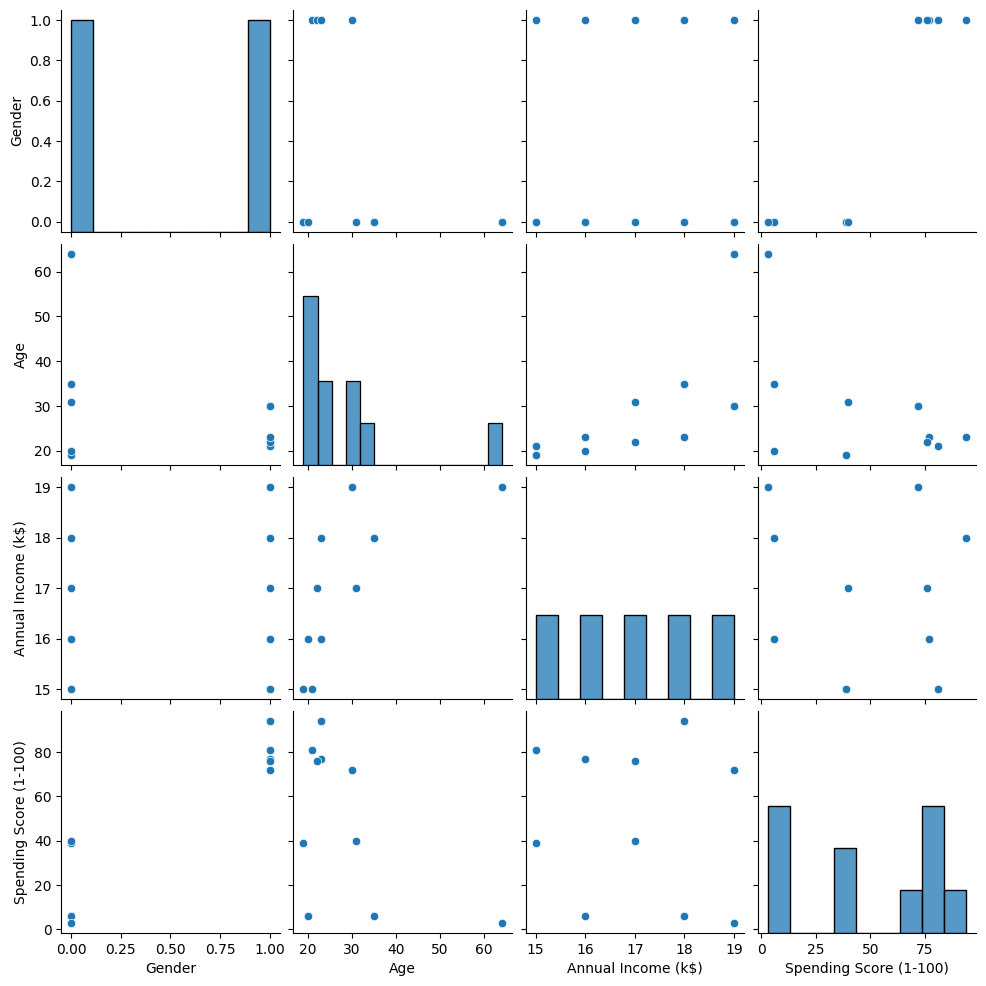

In [45]:
#here is performing EDA for detecting  outliers , spot corelations and to  understand feature distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting pairwise relationships between features
sns.pairplot(df)
plt.show()


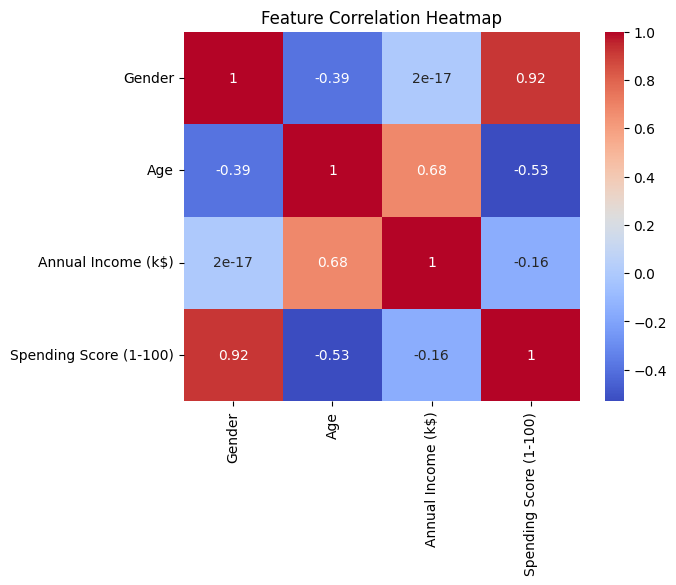

In [46]:
# Plotting the heatmap to show correlations between numerical features
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #annot shows the actual correlation vakues
plt.title("Feature Correlation Heatmap")
plt.show()


In [47]:
# checking NaN exists in the scaled data
import numpy as np

#Replacing NaN values with 0 or mean becouse k-mean does not work with Nans
scaled_data = np.nan_to_num(scaled_data)


In [48]:
# finding optimal number of clustures

from sklearn.cluster import KMeans
# making emptyl ist to store inertia values for each k
inertia = [] #Inertia is a metric used in K-Means Clustering
#to measure how tightly the data points are clustered around their cluster centroids.


In [49]:
# loop through values of k from 1 to 10 and store inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


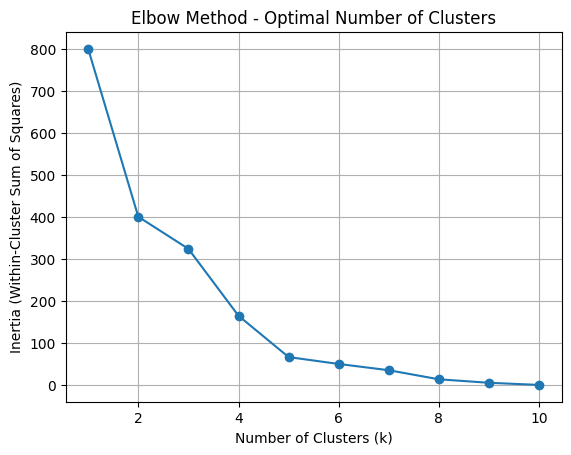

In [50]:
import matplotlib.pyplot as plt

# Plotting the Elbow graph to find optimal k
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [51]:
# applying k-mean clustering algo wiht choose number of clusture

kmeans = KMeans(n_clusters=5, random_state=42)


In [52]:
# Fit the model and predict cluster labels for all customer
df['Cluster'] = kmeans.fit_predict(scaled_data)


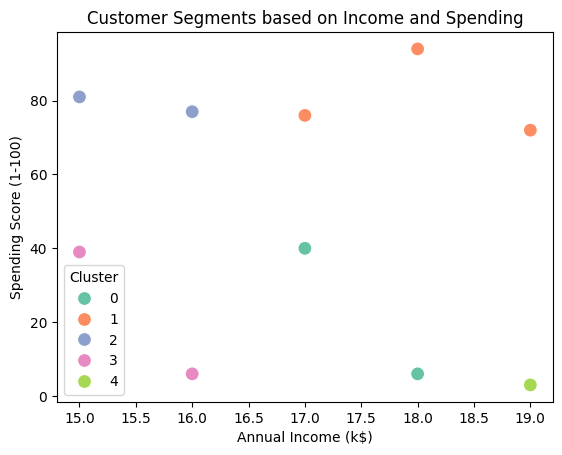

In [53]:
# visulization of clusters
# Scatter plot of clusters based on annual income and spending score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set2', s=100)
plt.title("Customer Segments based on Income and Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [54]:
# principle component analysis visualization
# cluster visualization by pca to reduce high dimensionality
from sklearn.decomposition import PCA

#apply PCA to reduce the scaled data into two dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)


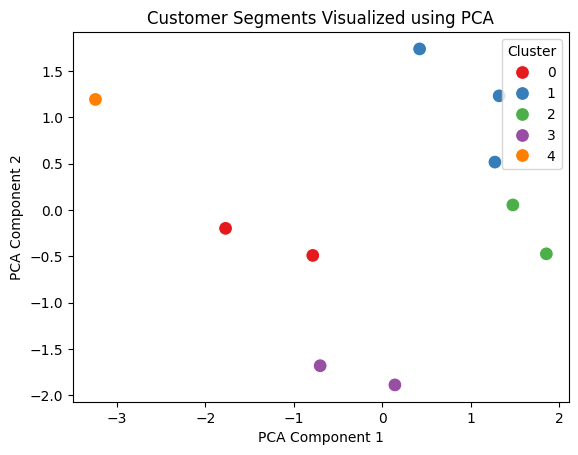

In [55]:
# plotting of clusters using PCA
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1],
                hue=df['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments Visualized using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [56]:
#Business insights and interpretation
# for getting average values for feature  which are grouping  by cluster
df.groupby('Cluster').mean(numeric_only=True)#it calculates income age as well


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.0,33.0,17.5,23.000000
1,1.0,25.0,18.0,80.666667
2,1.0,22.0,15.5,79.000000
3,0.0,19.5,15.5,22.500000
4,0.0,64.0,19.0,3.000000
